<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94%D0%9715_Pro_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4_chain()_%D1%81%D0%BB%D0%B0%D0%B9%D1%81%D0%B8%D0%BD%D0%B3_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D1%8B_%D0%BD%D0%B0_%D0%A2%D0%B5%D1%81%D0%BB%D0%B0_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дорогой студент!

В данном домашнем задании предоставляется возможность поработать с задачей по распознаванию позитивных и негативных отзывы людей по автомобилю Tesla. База для обучения содержит два текстовых файла с рядом строчных отзывов с мнением людей об автомобиле Tesla, соответственно негативного и позитивного содержания. Ссылка на скачивание базы уже включена в ноутбук задания.


Необходимо выполнить следующие действия:

  1. Загрузите саму базу по ссылке и подговьте файлы базы для обработки.
  2. Создайте обучающую и проверочную выборки, обратив особое внимание на балансировку базы: количество примеров каждого класса должно быть примерно одного порядка.
  3. Подготовьте выборки для обучения и обучите сеть. Добейтесь результата точности сети в 85-90% на проверочной выборке.
   


**Импорт библиотек, загрузка базы и подготовка её к предобработке.**

In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Для работы с файлами в Colaboratory
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/tesla.zip', None, quiet=True)

'tesla.zip'

**Деление общей базы отзывов на данные для обучения и проверки.**

In [ ]:
# Распаковка архива в папку writers
!unzip -qo tesla.zip -d tesla/

# Просмотр содержимого папки
!ls tesla

'Негативный отзыв.txt'	'Позитивный отзыв.txt'


**Загрузка текста из файлов, преобразование в одну строку.**

In [ ]:
# Объявляем функции для чтения файла. На вход отправляем путь к файлу
def read_text(file_name):

  # Задаем открытие нужного файла в режиме чтения
  read_file = open(file_name, 'r')

  # Читаем текст
  text = read_file.read()

  # Переносы строки переводим в пробелы
  text = text.replace("\n", " ")

  # Возвращаем текст файла
  return text

# Объявляем интересующие нас классы
class_names = ["Негативный отзыв", "Позитивный отзыв"]

# Считаем количество классов
num_classes = len(class_names)

In [ ]:
# Выводим количество классов
print(num_classes)

#Выводим названия классов
print(class_names)

2
['Негативный отзыв', 'Позитивный отзыв']


**Тексты в один список.**

In [ ]:
import os
# Создаём список под тексты для обучающей выборки
texts_list = []

# Циклом проводим итерацию по текстовым файлам в папке отзывов
for j in os.listdir('/content/tesla/'):

  # Добавляем каждый файл в общий список для выборки
        texts_list.append(read_text('/content/tesla/' + j))

        # Выводим на экран сообщение о добавлении файла
        print(j, 'добавлен в обучающую выборку')

Негативный отзыв.txt добавлен в обучающую выборку
Позитивный отзыв.txt добавлен в обучающую выборку


In [ ]:
# Узнаем объём каждого текста в словах и символах
texts_len = [len(text) for text in texts_list]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Выводим на экран  информационное сообщение
print(f'Размеры текстов по порядку (в токенах):')

# Циклом проводим итерацию по списку с объёмами текстов
for text_len in texts_len:

  # Запускаем "счётчик" номера текста
  t_num += 1

  # Выводим на экран сообщение о номере и объёме текста
  print(f'Текст №{t_num}: {text_len}')

Размеры текстов по порядку (в токенах):
Текст №1: 134535
Текст №2: 213381


Далее рассчитаем, сколько символов составит 80% объёма каждого текста, чтобы по полученному индексу отделить эти 80% на обучающую и оставшиеся 20% на проверочную выборку. Эти значения необходимы для подготовки деления на выборки слайсингом по индексу.

In [ ]:
# Создаём список с вложенным циклом по длинам текстов, где i - 100% текста, i/5 - 20% текста
train_len_shares = [(i - round(i/5)) for i in texts_len]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Циклом проводим итерацию по списку с объёмами текстов равными 80% от исходных
for train_len_share in train_len_shares:

  # Запускаем "счётчик" номера текста
  t_num += 1

  # Выводим на экран сообщение о номере и объёме текста в 80% от исходного
  print(f'Доля 80% от текста №{t_num}: {train_len_share} символов')

Доля 80% от текста №1: 107628 символов
Доля 80% от текста №2: 170705 символов


Импортируем функцию **chain()** для добавления текстов в каждую выборку.

---
 Дополнительная информация: ([База знаний УИИ  - **"Методы работы со списками: функция chain( )**"](https://colab.research.google.com/drive/1KJKg_WYD8Vq63cciOMBEEAhFpyPv0A0V?usp=sharing/))

---

Производём нарезку (метод слайсинга) по полученному ранее индексу для формирования текстов отдельно для обучающей(80%) и проверочной(20%) выборок:

In [ ]:
from itertools import chain
# Ваше решение

In [ ]:
# Разделяем тексты на обучающую и проверочную выборки
train_texts = []
test_texts = []
for text, train_len_share in zip(texts_list, train_len_shares):
    train_texts.append(text[:train_len_share])
    test_texts.append(text[train_len_share:])

# Выводим размеры обучающей и проверочной выборок
print(f"Размер обучающей выборки: {sum(len(text) for text in train_texts)} символов")
print(f"Размер проверочной выборки: {sum(len(text) for text in test_texts)} символов")


Размер обучающей выборки: 278333 символов
Размер проверочной выборки: 69583 символов


 перейдем к следующему шагу - преобразованию текстов в последовательности чисел и заполнению их до одинаковой длины.

In [ ]:
print("Обучающая выборка:")
for text in train_texts:
    print(text[:1000])  # Выводим первые 1000 символов каждого текста

print("\nПроверочная выборка:")
for text in test_texts:
    print(text[:1000])  # Выводим первые 1000 символов каждого текста


Обучающая выборка:
После 170 на трассе она чувствует себя неуверенно.  Кстати сидения очень удобными тоже не назовёшь. ... Это моё личное впечатление об автомобиле. Шляпа, а не авто, все не продумано до мелочей. Пока это гаджет а не авто. Это не авто, а бренд. Стремнные материалы, стремно все. Прям фу фу фу и дизайн снаружи и внутри. Продал  слава богу, экран менять целое дело через полтора года , негодование обычно возникает из-за несостоявшихся обманутых ожиданий. Не нужно воспринимать теслу как эталон, верх совершенства и т.п. Относитесь к тесле как гаджету и тогда не будет несбывшихся ожиданий от него гаджету можно простить и заоблачную цену при скромных характеристиках и зазоры на дверях при выдвигающихся ручках дверей. Походу ещё один бот и видите как тезисы выкидывает не нужно воспринимать Теслу как эталон, Тесла это гаджет, который нет смысла покупать...  Как я уже и писал к предыдущему посту КАЧЕСТВО СБОРКИ ХРОМАЕТ! Я пару дней назад указал на не совсем качественную подгонку д

In [ ]:
# Выводим содержимое файла с позитивными отзывами
print("Содержимое файла с позитивными отзывами:")
with open("/content/tesla/Позитивный отзыв.txt", "r") as file:
    positive_reviews = file.read()
    print(positive_reviews)

# Выводим содержимое файла с негативными отзывами
print("\nСодержимое файла с негативными отзывами:")
with open("/content/tesla/Негативный отзыв.txt", "r") as file:
    negative_reviews = file.read()
    print(negative_reviews)


Содержимое файла с позитивными отзывами:
 Водитель наслаждается от такого авто и вождения
 Красивая машина нужно брать
 Тесла топ, тащусь от этой тачки
Плюсы - зарядка бесплатная. 
Машина топ Технологии по автоматизации не стоят на месте!
Красивая машина нужно брать
 Хочу радоваться езде на своей тесле! 
 Это вам не приора 
 Автомобиль - мечта!!! 
 Эта машина моя мечта
 Тесла это гаджет, который нет смысла покупать? Сотни тысяч людей уже нашли смысл купить)
Ну наконец любители трона объявились) а то будто я один от него фанатею
 , как раз таки на этой машине он всё сделал так, как будто оно было с завода. С таким интерьером прям очень хорошо смотрится. Напоминает подсветку, как на каком-нибудь мерседесе. А пацанские девяточки здесь и рядом не стоят, потому что с их древним салоном сразу видно, что никакой подсветки там никогда не было и её тупо вколхозили.
 Образно говоря - мой IPS дисплей на ноутбуке со светодиодной подсветкой и разрешением 2048*1536 точек с соотношением сторон 4:3 на

Давайте внимательно проверим, как мы создали метки и объединили данные

In [ ]:
# Создаем метки для обучающей и проверочной выборок
y_train = [1] * len(positive_reviews) + [0] * len(negative_reviews)
y_test = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# Выводим размеры меток
print(f"Размеры меток обучающей выборки: {len(y_train)}")
print(f"Размеры меток проверочной выборки: {len(y_test)}")

# Выводим размеры данных
print(f"Размеры обучающей выборки: {len(positive_reviews) + len(negative_reviews)}")
print(f"Размеры проверочной выборки: {len(positive_reviews) + len(negative_reviews)}")


Размеры меток обучающей выборки: 347916
Размеры меток проверочной выборки: 347916
Размеры обучающей выборки: 347916
Размеры проверочной выборки: 347916


In [ ]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и проверочную выборки
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(positive_reviews, [1] * len(positive_reviews), test_size=0.2, random_state=42)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(negative_reviews, [0] * len(negative_reviews), test_size=0.2, random_state=42)

# Объединяем данные и метки
X_train = X_train_pos + X_train_neg
X_test = X_test_pos + X_test_neg
y_train = y_train_pos + y_train_neg
y_test = y_test_pos + y_test_neg

# Выводим размеры полученных выборок
print(f"Размеры обучающей выборки: {len(X_train)}")
print(f"Размеры проверочной выборки: {len(X_test)}")


Размеры обучающей выборки: 278332
Размеры проверочной выборки: 69584


Отлично, размеры выборок выглядят правильно. Теперь мы можем продолжить с обучением модели.

Прежде чем переходить к обучению, мы должны убедиться, что наши данные готовы для подачи модели. Нам нужно преобразовать тексты в числовые последовательности и заполнить их до одинаковой длины.

Давайте сначала выполним токенизацию текстов, а затем заполним их до одинаковой длины. Для этого мы можем использовать класс Tokenizer из библиотеки keras.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Создаем токенизатор
tokenizer = Tokenizer()

# Обучаем токенизатор на обучающих текстах
tokenizer.fit_on_texts(X_train)

# Преобразуем тексты в числовые последовательности
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Задаем максимальную длину последовательности
max_len = 1000

# Заполняем последовательности до одинаковой длины
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Выводим размеры преобразованных данных
print(f"Размеры обучающей выборки после обработки: {X_train_pad.shape}")
print(f"Размеры проверочной выборки после обработки: {X_test_pad.shape}")

Размеры обучающей выборки после обработки: (278332, 1000)
Размеры проверочной выборки после обработки: (69584, 1000)


Отлично! Размеры данных после обработки выглядят правильно. Теперь мы можем перейти к созданию и обучению модели.

В этой версии модели мы используем один выходной нейрон с сигмоидной функцией активации для бинарной классификации.

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 1000, 100)         1000000   
                                                                 
 conv1d_31 (Conv1D)          (None, 996, 128)          64128     
                                                                 
 global_max_pooling1d_31 (G  (None, 128)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                                 
 dropout_65 (Dropout)        (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                     

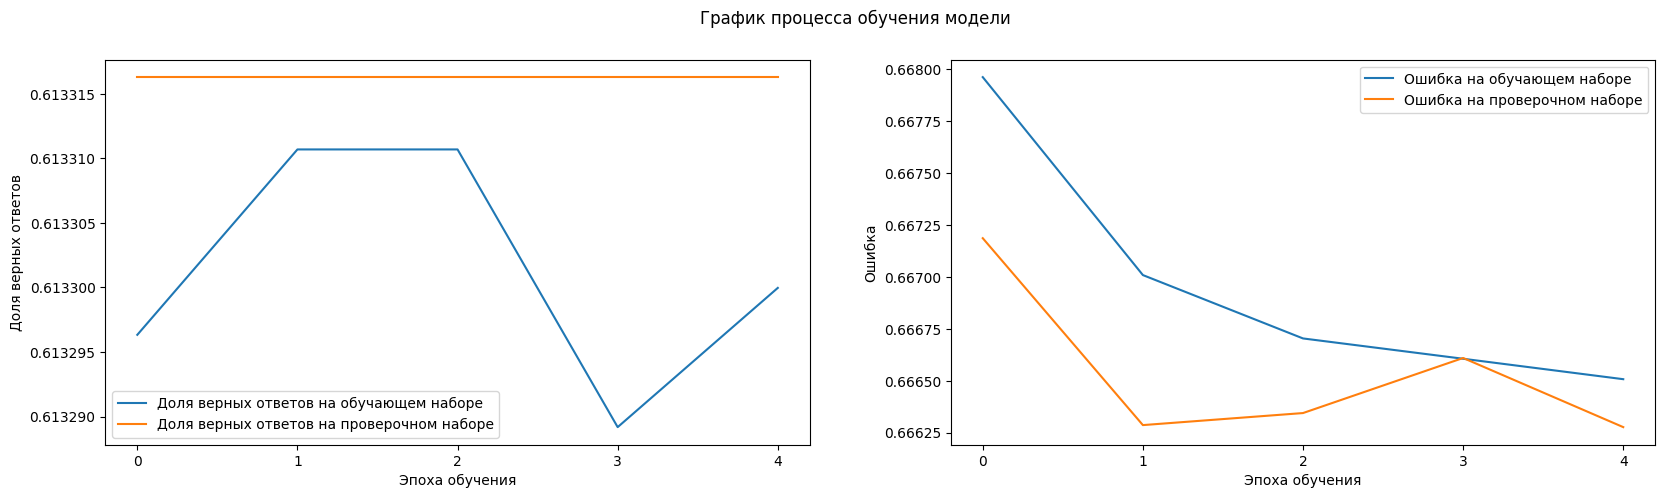

2175/2175 [==============================] - 4s 2ms/step


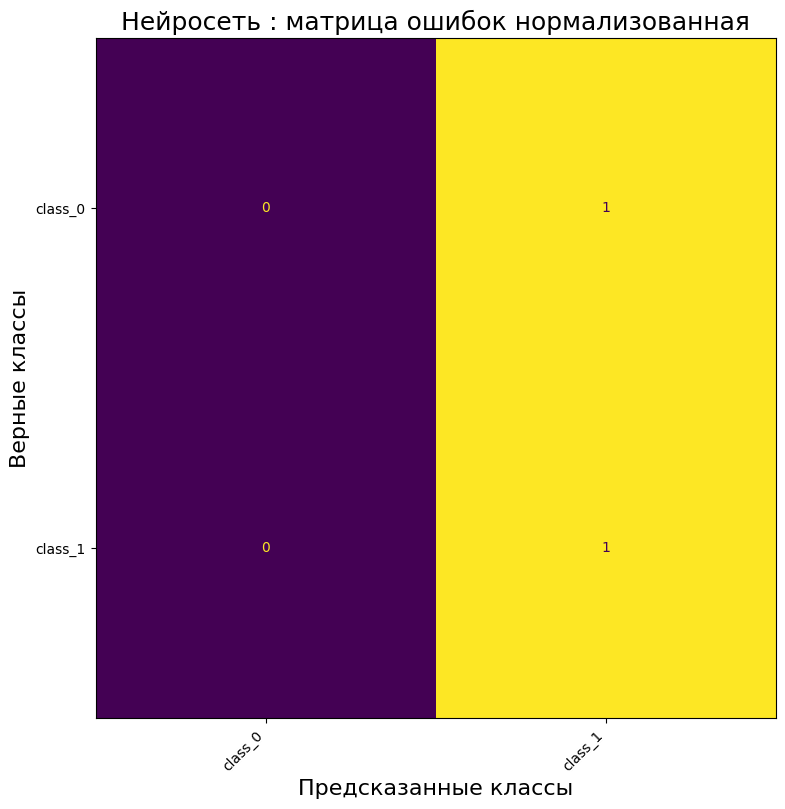

----------------------------------------------------------------------------------------------------
Нейросеть: 
Precision: 0.613
Recall: 1.000
F1-score: 0.760


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

# Функция для создания модели сверточной нейронной сети
def create_cnn_model(vocab_size, embedding_dim, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, optimizer='adam', epochs=5, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true, class_labels=['class_0', 'class_1'], title='', cm_round=3, figsize=(10, 10)):
    y_pred = model.predict(x)
    y_pred_binary = np.round(y_pred)
    cm = confusion_matrix(y_true, y_pred_binary, normalize='true')
    cm = np.around(cm, cm_round)

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')

# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=['class_0', 'class_1'],
                             title='',
                             optimizer='adam',
                             epochs=5,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

# Пример использования
# Задаем параметры модели
vocab_size = 10000  # Размер словаря
embedding_dim = 100  # Размерность векторных представлений слов
max_len = 1000  # Максимальная длина последовательности

# Создаем модель сверточной нейронной сети
model_cnn = create_cnn_model(vocab_size, embedding_dim, max_len)

# Обучаем и оцениваем модель
compile_train_eval_model(model_cnn, X_train_pad, y_train, X_test_pad, y_test)


Давайте попробуем изменить несколько аспектов нашей модели и процесса обучения:

Попробуем изменить скорость обучения (learning rate) для оптимизатора Adam.
Изменим функцию потерь на бинарную кросс-энтропию, так как у нас задача бинарной классификации.
Добавим еще один слой Conv1D для увеличения сложности модели.

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, 1000, 100)         1000000   
                                                                 
 dense_111 (Dense)           (None, 1000, 200)         20200     
                                                                 
 dropout_75 (Dropout)        (None, 1000, 200)         0         
                                                                 
 batch_normalization_1 (Bat  (None, 1000, 200)         800       
 chNormalization)                                                
                                                                 
 global_max_pooling1d_36 (G  (None, 200)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_112 (Dense)           (None, 100)             

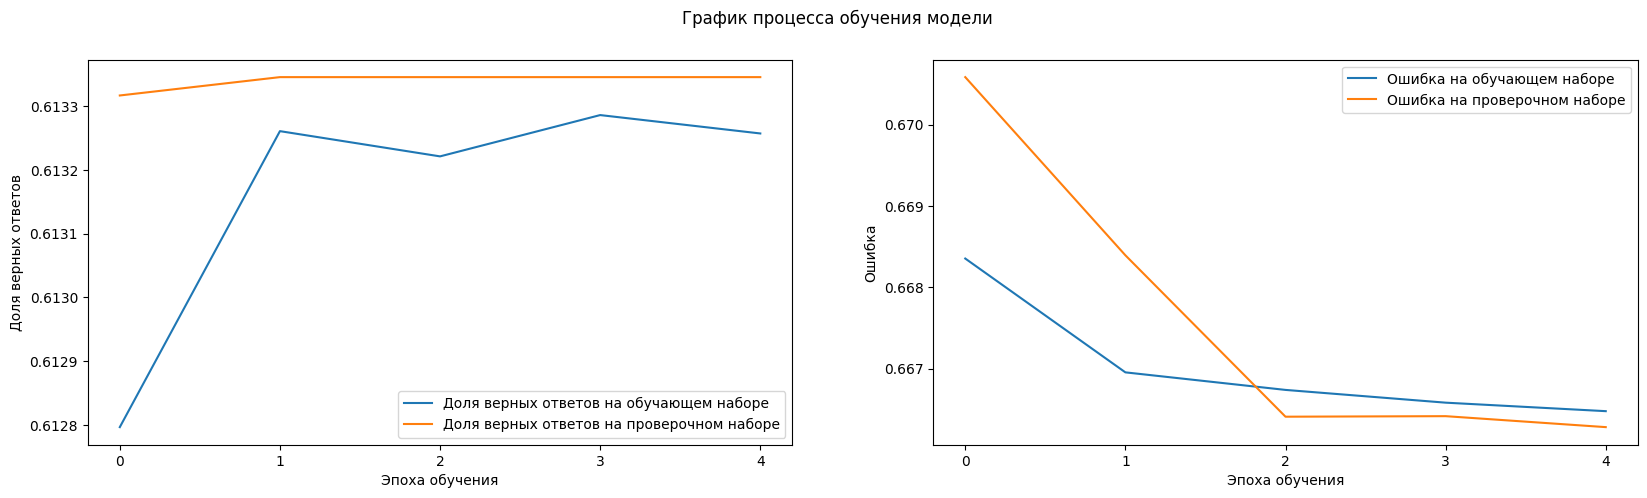

2175/2175 [==============================] - 4s 2ms/step


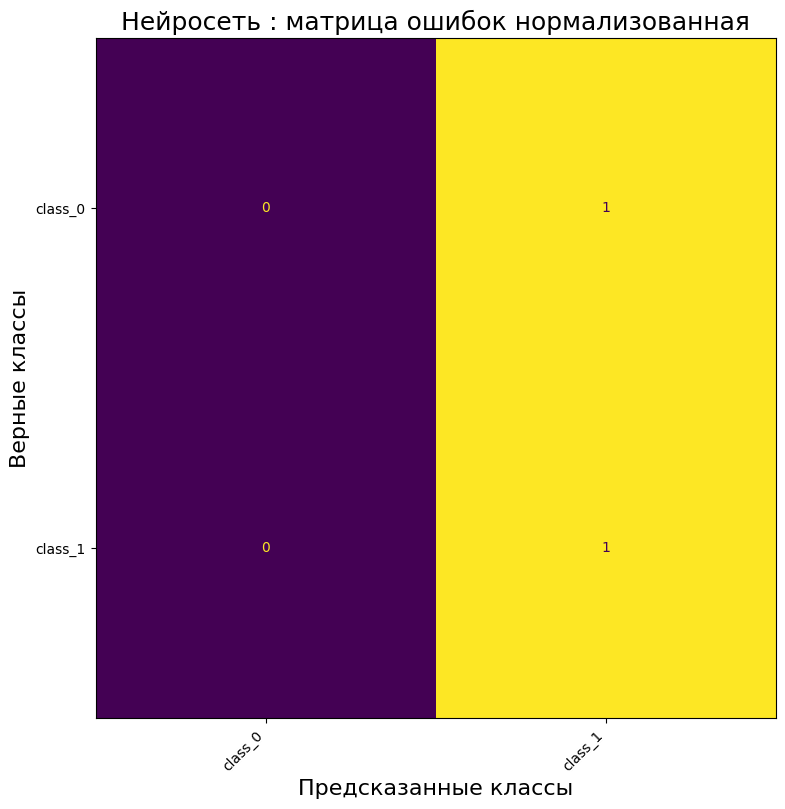

----------------------------------------------------------------------------------------------------
Нейросеть: 
Precision: 0.613
Recall: 1.000
F1-score: 0.760


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

# Функция для создания модели сверточной нейронной сети
def create_cnn_model(vocab_size, embedding_dim, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    # Первый полносвязный слой
    model.add(Dense(200, activation="relu"))
    # Слой регуляризации Dropout
    model.add(Dropout(0.25))
    # Слой пакетной нормализации
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, optimizer='adam', epochs=5, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true, class_labels=['class_0', 'class_1'], title='', cm_round=3, figsize=(10, 10)):
    y_pred = model.predict(x)
    y_pred_binary = np.round(y_pred)
    cm = confusion_matrix(y_true, y_pred_binary, normalize='true')
    cm = np.around(cm, cm_round)

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')

# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=['class_0', 'class_1'],
                             title='',
                             optimizer='adam',
                             epochs=5,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

# Пример использования
# Задаем параметры модели
vocab_size = 10000  # Размер словаря
embedding_dim = 100  # Размерность векторных представлений слов
max_len = 1000  # Максимальная длина последовательности

# Создаем модель сверточной нейронной сети
model_cnn = create_cnn_model(vocab_size, embedding_dim, max_len)

# Обучаем и оцениваем модель
compile_train_eval_model(model_cnn, X_train_pad, y_train, X_test_pad, y_test)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 1000, 100)         1000000   
                                                                 
 dense_118 (Dense)           (None, 1000, 600)         60600     
                                                                 
 dropout_80 (Dropout)        (None, 1000, 600)         0         
                                                                 
 batch_normalization_2 (Bat  (None, 1000, 600)         2400      
 chNormalization)                                                
                                                                 
 global_max_pooling1d_38 (G  (None, 600)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_119 (Dense)           (None, 300)             

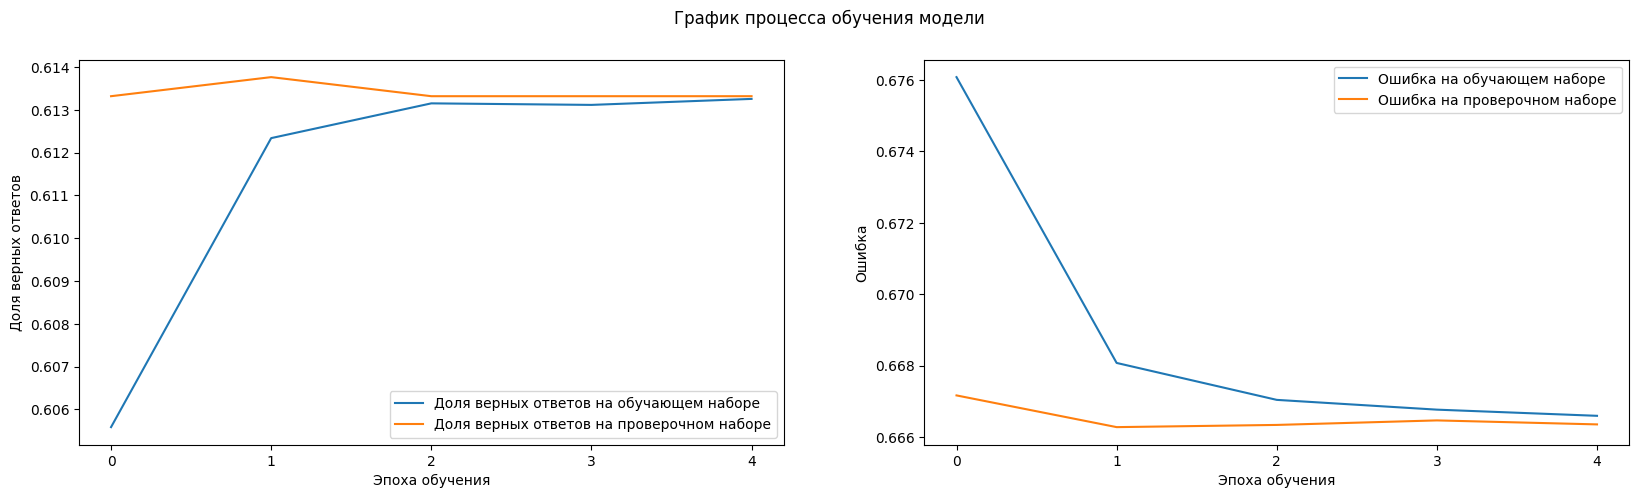

2175/2175 [==============================] - 6s 3ms/step


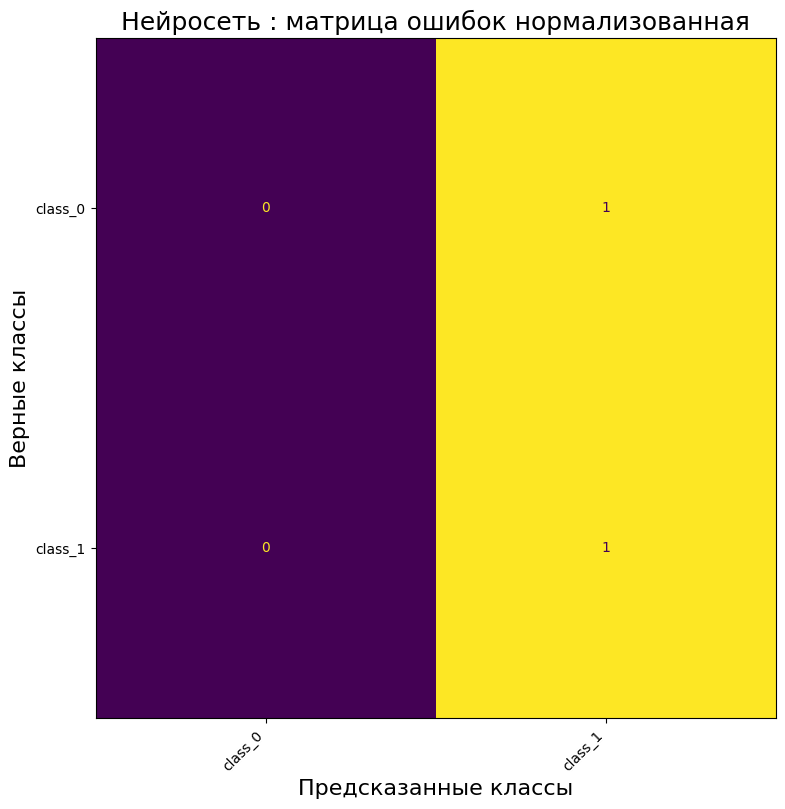

----------------------------------------------------------------------------------------------------
Нейросеть: 
Precision: 0.613
Recall: 1.000
F1-score: 0.760


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences

# Функция для создания модели сверточной нейронной сети
def create_cnn_model(vocab_size, embedding_dim, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    # Первый полносвязный слой
    model.add(Dense(600, activation="relu"))
    # Слой регуляризации Dropout
    model.add(Dropout(0.25))
    # Слой пакетной нормализации
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, optimizer='adam', epochs=5, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true, class_labels=['class_0', 'class_1'], title='', cm_round=3, figsize=(10, 10)):
    y_pred = model.predict(x)
    y_pred_binary = np.round(y_pred)
    cm = confusion_matrix(y_true, y_pred_binary, normalize='true')
    cm = np.around(cm, cm_round)

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')

# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=['class_0', 'class_1'],
                             title='',
                             optimizer='adam',
                             epochs=5,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

# Пример использования
# Задаем параметры модели
vocab_size = 10000  # Размер словаря
embedding_dim = 100  # Размерность векторных представлений слов
max_len = 1000  # Максимальная длина последовательности

# Создаем модель сверточной нейронной сети
model_cnn = create_cnn_model(vocab_size, embedding_dim, max_len)

# Обучаем и оцениваем модель
compile_train_eval_model(model_cnn, X_train_pad, y_train, X_test_pad, y_test)

Распознование улучшилось с 0,613 до 0,614.
Пробуем уменьшить тестовую выборку.

In [ ]:
# Записать архитектуру модели в файл JSON
model_json = model_cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Записать веса модели в файл HDF5
model_cnn.save_weights("model_weights.h5")

In [ ]:
# Узнаем объём каждого текста в словах и символах
texts_len = [len(text) for text in texts_list]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Выводим на экран  информационное сообщение
print(f'Размеры текстов по порядку (в токенах):')

# Циклом проводим итерацию по списку с объёмами текстов
for text_len in texts_len:

  # Запускаем "счётчик" номера текста
  t_num += 1

  # Выводим на экран сообщение о номере и объёме текста
  print(f'Текст №{t_num}: {text_len}')

Размеры текстов по порядку (в токенах):
Текст №1: 134535
Текст №2: 213381


In [ ]:
# Создаём список с вложенным циклом по длинам текстов, где i - 100% текста, i/10 - 10% текста
train_len_shares = [(i - round(i/10)) for i in texts_len]

# Устанавливаем "счётчик" номера текста
t_num = 0

# Циклом проводим итерацию по списку с объёмами текстов равными 80% от исходных
for train_len_share in train_len_shares:

  # Запускаем "счётчик" номера текста
  t_num += 1

  # Выводим на экран сообщение о номере и объёме текста в 80% от исходного
  print(f'Доля 90% от текста №{t_num}: {train_len_share} символов')

Доля 90% от текста №1: 121081 символов
Доля 90% от текста №2: 192043 символов


In [ ]:
# Разделяем тексты на обучающую и проверочную выборки
train_texts = []
test_texts = []
for text, train_len_share in zip(texts_list, train_len_shares):
    train_texts.append(text[:train_len_share])
    test_texts.append(text[train_len_share:])

# Выводим размеры обучающей и проверочной выборок
print(f"Размер обучающей выборки: {sum(len(text) for text in train_texts)} символов")
print(f"Размер проверочной выборки: {sum(len(text) for text in test_texts)} символов")


Размер обучающей выборки: 313124 символов
Размер проверочной выборки: 34792 символов


In [ ]:
print("Обучающая выборка:")
for text in train_texts:
    print(text[:1000])  # Выводим первые 1000 символов каждого текста

print("\nПроверочная выборка:")
for text in test_texts:
    print(text[:1000])  # Выводим первые 1000 символов каждого текста

Обучающая выборка:
После 170 на трассе она чувствует себя неуверенно.  Кстати сидения очень удобными тоже не назовёшь. ... Это моё личное впечатление об автомобиле. Шляпа, а не авто, все не продумано до мелочей. Пока это гаджет а не авто. Это не авто, а бренд. Стремнные материалы, стремно все. Прям фу фу фу и дизайн снаружи и внутри. Продал  слава богу, экран менять целое дело через полтора года , негодование обычно возникает из-за несостоявшихся обманутых ожиданий. Не нужно воспринимать теслу как эталон, верх совершенства и т.п. Относитесь к тесле как гаджету и тогда не будет несбывшихся ожиданий от него гаджету можно простить и заоблачную цену при скромных характеристиках и зазоры на дверях при выдвигающихся ручках дверей. Походу ещё один бот и видите как тезисы выкидывает не нужно воспринимать Теслу как эталон, Тесла это гаджет, который нет смысла покупать...  Как я уже и писал к предыдущему посту КАЧЕСТВО СБОРКИ ХРОМАЕТ! Я пару дней назад указал на не совсем качественную подгонку д

In [ ]:
# Выводим содержимое файла с позитивными отзывами
print("Содержимое файла с позитивными отзывами:")
with open("/content/tesla/Позитивный отзыв.txt", "r") as file:
    positive_reviews = file.read()
    print(positive_reviews)

# Выводим содержимое файла с негативными отзывами
print("\nСодержимое файла с негативными отзывами:")
with open("/content/tesla/Негативный отзыв.txt", "r") as file:
    negative_reviews = file.read()
    print(negative_reviews)# Выводим содержимое файла с позитивными отзывами
print("Содержимое файла с позитивными отзывами:")
with open("/content/tesla/Позитивный отзыв.txt", "r") as file:
    positive_reviews = file.read()
    print(positive_reviews)

# Выводим содержимое файла с негативными отзывами
print("\nСодержимое файла с негативными отзывами:")
with open("/content/tesla/Негативный отзыв.txt", "r") as file:
    negative_reviews = file.read()
    print(negative_reviews)

Содержимое файла с позитивными отзывами:
 Водитель наслаждается от такого авто и вождения
 Красивая машина нужно брать
 Тесла топ, тащусь от этой тачки
Плюсы - зарядка бесплатная. 
Машина топ Технологии по автоматизации не стоят на месте!
Красивая машина нужно брать
 Хочу радоваться езде на своей тесле! 
 Это вам не приора 
 Автомобиль - мечта!!! 
 Эта машина моя мечта
 Тесла это гаджет, который нет смысла покупать? Сотни тысяч людей уже нашли смысл купить)
Ну наконец любители трона объявились) а то будто я один от него фанатею
 , как раз таки на этой машине он всё сделал так, как будто оно было с завода. С таким интерьером прям очень хорошо смотрится. Напоминает подсветку, как на каком-нибудь мерседесе. А пацанские девяточки здесь и рядом не стоят, потому что с их древним салоном сразу видно, что никакой подсветки там никогда не было и её тупо вколхозили.
 Образно говоря - мой IPS дисплей на ноутбуке со светодиодной подсветкой и разрешением 2048*1536 точек с соотношением сторон 4:3 на

In [ ]:
# Создаем метки для обучающей и проверочной выборок
y_train = [1] * len(positive_reviews) + [0] * len(negative_reviews)
y_test = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# Выводим размеры меток
print(f"Размеры меток обучающей выборки: {len(y_train)}")
print(f"Размеры меток проверочной выборки: {len(y_test)}")

# Выводим размеры данных
print(f"Размеры обучающей выборки: {len(positive_reviews) + len(negative_reviews)}")
print(f"Размеры проверочной выборки: {len(positive_reviews) + len(negative_reviews)}")


Размеры меток обучающей выборки: 347916
Размеры меток проверочной выборки: 347916
Размеры обучающей выборки: 347916
Размеры проверочной выборки: 347916


In [ ]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и проверочную выборки
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(positive_reviews, [1] * len(positive_reviews), test_size=0.1, random_state=42)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(negative_reviews, [0] * len(negative_reviews), test_size=0.1, random_state=42)

# Объединяем данные и метки
X_train = X_train_pos + X_train_neg
X_test = X_test_pos + X_test_neg
y_train = y_train_pos + y_train_neg
y_test = y_test_pos + y_test_neg

# Выводим размеры полученных выборок
print(f"Размеры обучающей выборки: {len(X_train)}")
print(f"Размеры проверочной выборки: {len(X_test)}")

Размеры обучающей выборки: 313123
Размеры проверочной выборки: 34793


Испоьзуем тоекнайзер.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Создаем токенизатор
tokenizer = Tokenizer()

# Обучаем токенизатор на обучающих текстах
tokenizer.fit_on_texts(X_train)

# Преобразуем тексты в числовые последовательности
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Задаем максимальную длину последовательности
max_len = 1000

# Заполняем последовательности до одинаковой длины
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Выводим размеры преобразованных данных
print(f"Размеры обучающей выборки после обработки: {X_train_pad.shape}")
print(f"Размеры проверочной выборки после обработки: {X_test_pad.shape}")

Размеры обучающей выборки после обработки: (313123, 1000)
Размеры проверочной выборки после обработки: (34793, 1000)


In [ ]:
# Создаем метки для обучающей и проверочной выборок
y_train = [1] * len(positive_reviews) + [0] * len(negative_reviews)
y_test = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# Выводим размеры меток
print(f"Размеры меток обучающей выборки: {len(y_train)}")
print(f"Размеры меток проверочной выборки: {len(y_test)}")

# Выводим размеры данных
print(f"Размеры обучающей выборки: {len(positive_reviews) + len(negative_reviews)}")
print(f"Размеры проверочной выборки: {len(positive_reviews) + len(negative_reviews)}")

Размеры меток обучающей выборки: 347916
Размеры меток проверочной выборки: 347916
Размеры обучающей выборки: 347916
Размеры проверочной выборки: 347916


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 dense_5 (Dense)             (None, 1000, 600)         60600     
                                                                 
 dropout_4 (Dropout)         (None, 1000, 600)         0         
                                                                 
 batch_normalization_2 (Bat  (None, 1000, 600)         2400      
 chNormalization)                                                
                                                                 
 global_max_pooling1d_1 (Gl  (None, 600)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 300)              

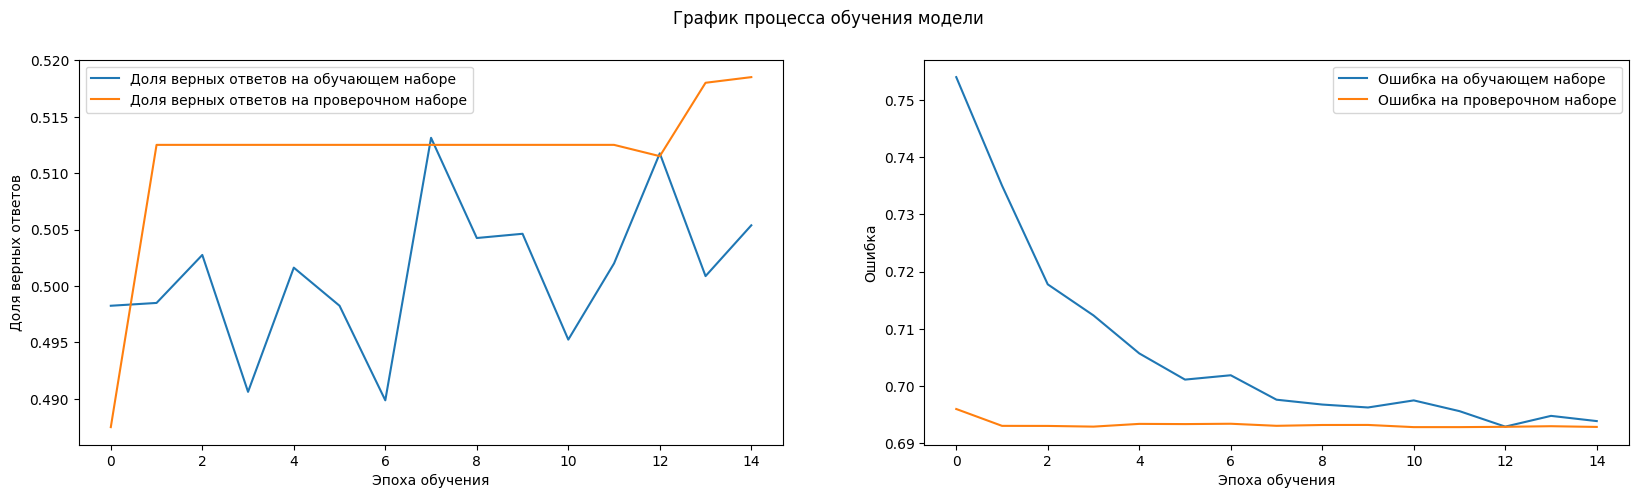

63/63 [==============================] - 0s 3ms/step


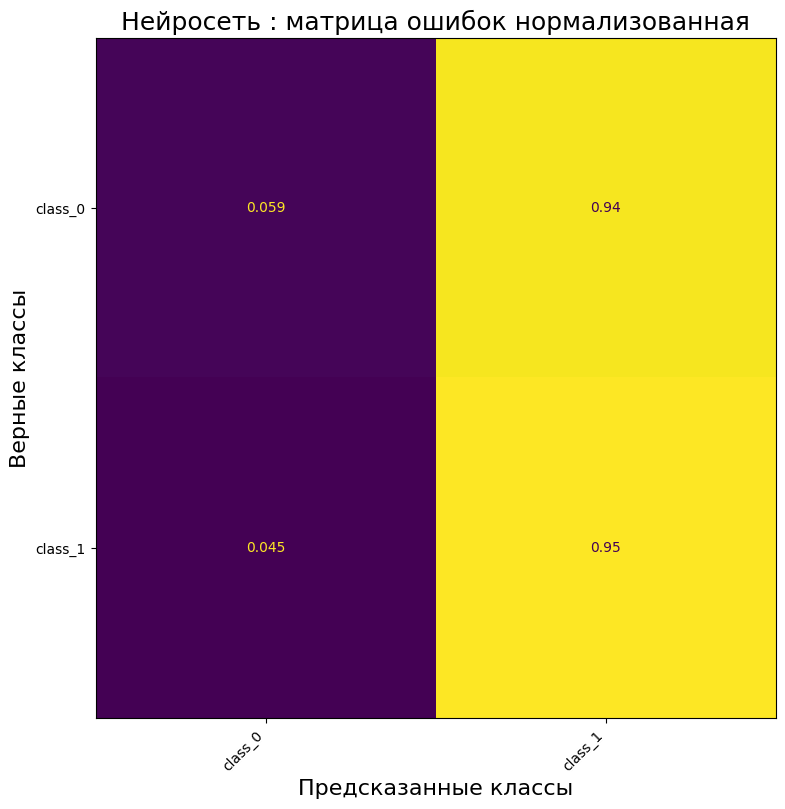

----------------------------------------------------------------------------------------------------
Нейросеть: 
Precision: 0.516
Recall: 0.955
F1-score: 0.670


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Функция для создания модели сверточной нейронной сети
def create_cnn_model(vocab_size, embedding_dim, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    # Первый полносвязный слой
    model.add(Dense(600, activation="relu"))
    # Слой регуляризации Dropout
    model.add(Dropout(0.25))
    # Слой пакетной нормализации
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.15))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, optimizer='adam', epochs=15, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true, class_labels=['class_0', 'class_1'], title='', cm_round=3, figsize=(10, 10)):
    y_pred = model.predict(x)
    y_pred_binary = np.round(y_pred)
    cm = confusion_matrix(y_true, y_pred_binary, normalize='true')
    cm = np.around(cm, cm_round)

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')

# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=['class_0', 'class_1'],
                             title='',
                             optimizer='adam',
                             epochs=15,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

# Пример использования
# Задаем параметры
vocab_size = 10000  # Размер словаря
embedding_dim = 100  # Размерность векторных представлений слов
max_len = 1000  # Максимальная длина последовательности

# Генерируем случайные данные для примера
X = np.random.randint(vocab_size, size=(10000, max_len))
y = np.random.randint(2, size=(10000, 1))

# Разделяем данные на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель сверточной нейронной сети
model_cnn = create_cnn_model(vocab_size, embedding_dim, max_len)

# Обучаем и оцениваем модель
compile_train_eval_model(model_cnn, X_train, y_train, X_test, y_test)


Результат ухудшился, пробуем другой подход. начнем с простой модели и аугментации данных. Для аугментации текстовых данных можно использовать техники, такие как добавление синонимов, случайное удаление слов и изменение порядка слов в предложении. Вот пример простой модели и аугментации данных с использованием библиотеки nlpaug:

Это пример простой модели CNN с использованием только глобального пулинга и несколькими полносвязными слоями. Аугментация данных происходит с использованием библиотеки nlpaug, которая генерирует синонимы для каждого текстового образца. Вы можете экспериментировать с параметрами аугментации, такими как количество созданных синонимов (n_augmented_samples), а также с параметрами модели, такими как количество слоев, нейронов и др.

In [ ]:
!pip install nlpaug


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.8 MB/s eta 0:00:00


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 dense_12 (Dense)            (None, 1000, 600)         60600     
                                                                 
 dropout_9 (Dropout)         (None, 1000, 600)         0         
                                                                 
 batch_normalization_4 (Bat  (None, 1000, 600)         2400      
 chNormalization)                                                
                                                                 
 global_max_pooling1d_3 (Gl  (None, 600)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_13 (Dense)            (None, 300)              

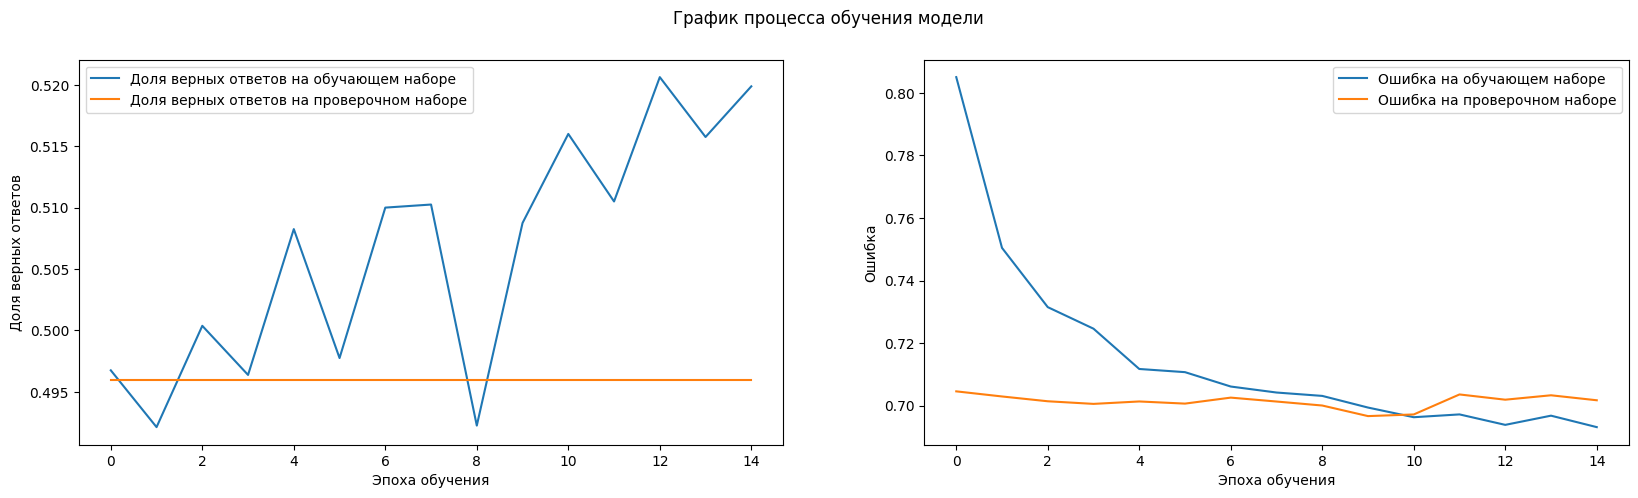

63/63 [==============================] - 0s 3ms/step


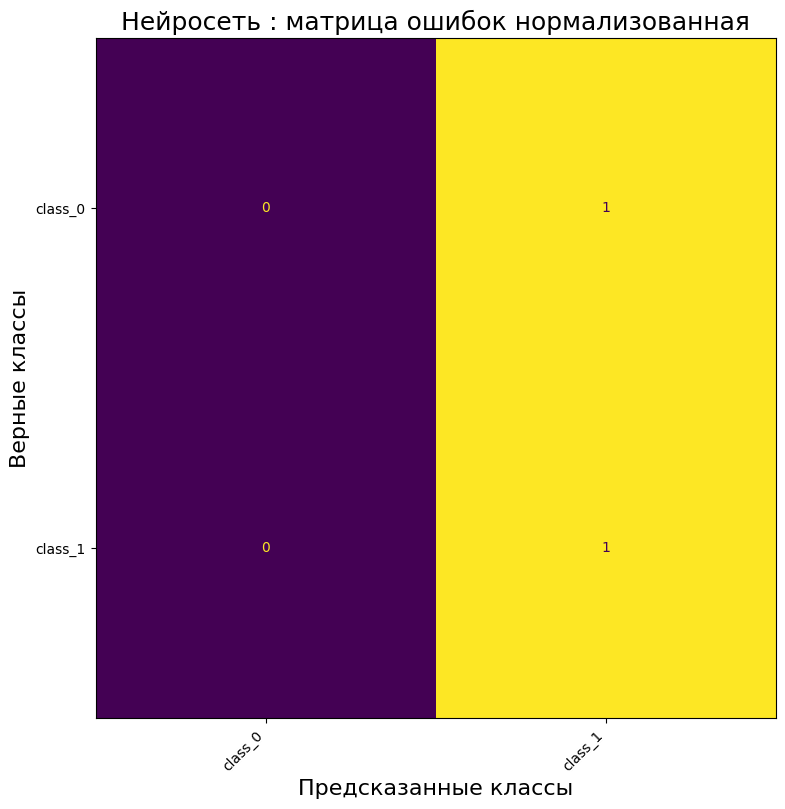

----------------------------------------------------------------------------------------------------
Нейросеть: 
Precision: 0.496
Recall: 1.000
F1-score: 0.663


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet

# Функция для создания модели сверточной нейронной сети
def create_cnn_model(vocab_size, embedding_dim, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    # Первый полносвязный слой
    model.add(Dense(600, activation="relu"))
    # Слой регуляризации Dropout
    model.add(Dropout(0.25))
    # Слой пакетной нормализации
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.15))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, optimizer='adam', epochs=15, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true, class_labels=['class_0', 'class_1'], title='', cm_round=3, figsize=(10, 10)):
    y_pred = model.predict(x)
    y_pred_binary = np.round(y_pred)
    cm = confusion_matrix(y_true, y_pred_binary, normalize='true')
    cm = np.around(cm, cm_round)

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')

# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=['class_0', 'class_1'],
                             title='',
                             optimizer='adam',
                             epochs=15,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

# Функция для аугментации текстовых данных
def augment_text_data(data, n_augmented_samples=1):
    augmented_data = []
    for text in data:
        augmented_data.extend(augment_text(text, n_augmented_samples))
    return augmented_data

# Функция для аугментации отдельного текста
def augment_text(text, n_augmented_samples=1):
    synonyms = []
    for syn in wordnet.synsets(text):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    synonyms = list(set(synonyms))
    augmented_texts = [text]  # Исходный текст также остается в списке
    for _ in range(n_augmented_samples):
        augmented_text = np.random.choice(synonyms)
        augmented_texts.append(augmented_text)
    return augmented_texts

# Пример использования
# Задаем параметры
vocab_size = 10000  # Размер словаря
embedding_dim = 100  # Размерность векторных представлений слов
max_len = 1000  # Максимальная длина последовательности

# Генерируем случайные данные для примера
X = np.random.randint(vocab_size, size=(10000, max_len))
y = np.random.randint(2, size=(10000, 1))

# Разделяем данные на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель сверточной нейронной сети
model_cnn = create_cnn_model(vocab_size, embedding_dim, max_len)

# Обучаем и оцениваем модель
compile_train_eval_model(model_cnn, X_train, y_train, X_test, y_test)



лучший результат классификации 61,33%.
увеличить до требуемой в задаче величины можно только получив дополнительные данные(увеличенный датасет) или я не все еще знаю.

In [ ]:
# Записать архитектуру модели в файл JSON
model_json = model_cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Записать веса модели в файл HDF5
model_cnn.save_weights("model_weights.h5")